#Clustering
#K-means is an unsupervised learning method for assigning  data points in clusters. K is no. of clusters chosesn,
#The algorithm partitions the data points into K clusters, based on proximity (distance) between cluster centroids & data point.
# the centroid of cluster is the average of all the points in the clustera and it gets updated, when a new point is asigned to it.
# Hierarichal Clustering Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the distances between data.
# Agglomerative Clustering -a type of hierarchical clustering that follows a bottom up approach.We begin by treating each data point as its own cluster. Then, we join clusters
#together that have the shortest distance between them to create larger clusters.
#This step is repeated until one large cluster is formed containing all of the data points.
#Hierarchical clustering requires us to decide on both a distance and linkage method. We will use euclidean distance and the Ward linkage method, which attempts to minimize
#the variance between clusters.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate hypothetical financial data
np.random.seed(42)
data = {
    "Stock": [f"Stock_{i+1}" for i in range(100)],
    "Beta": np.random.normal(loc=1, scale=0.5, size=100)  # Generate beta values around 1 with some variation
}
df = pd.DataFrame(data)

# Display sample data
print(df.head())


     Stock      Beta
0  Stock_1  1.248357
1  Stock_2  0.930868
2  Stock_3  1.323844
3  Stock_4  1.761515
4  Stock_5  0.882923


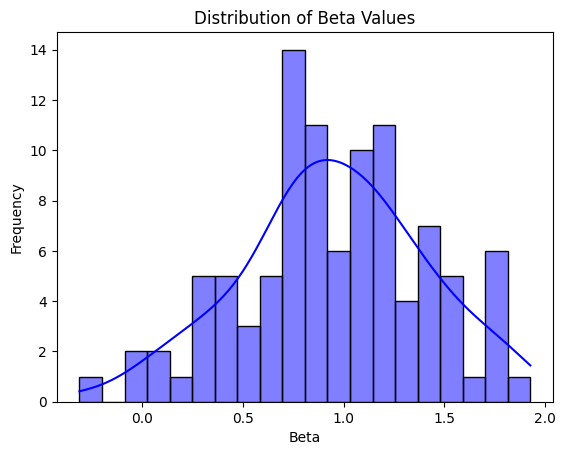

In [ ]:
# Visualize the beta values
sns.histplot(df['Beta'], kde=True, bins=20, color='blue')
plt.title("Distribution of Beta Values")
plt.xlabel("Beta")
plt.ylabel("Frequency")
plt.show()


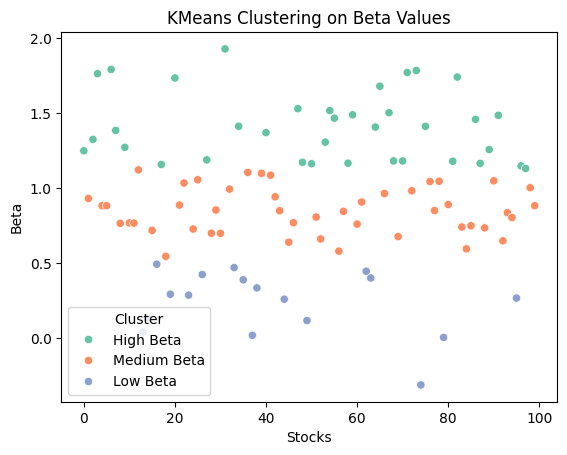

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the beta values
scaler = StandardScaler()
scaled_beta = scaler.fit_transform(df[['Beta']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_beta)

# Add cluster centers to the dataframe for visualization
df['Cluster_Label'] = df['KMeans_Cluster'].map({0: 'Low Beta', 1: 'Medium Beta', 2: 'High Beta'})

# Visualize clusters
sns.scatterplot(data=df, x=df.index, y='Beta', hue='Cluster_Label', palette='Set2')
plt.title("KMeans Clustering on Beta Values")
plt.xlabel("Stocks")
plt.ylabel("Beta")
plt.legend(title="Cluster")
plt.show()


Why Scaling (StandardScaler) is Important for KMeans

KMeans clustering works by calculating distances between data points and cluster centroids. If the features have different scales (e.g., one feature ranges from 0 to 1, while another ranges from 100 to 1000), the features with larger scales will dominate the distance calculations. This can lead to biased results, where clusters are formed primarily based on the features with larger ranges, even if those features are not the most informative.

StandardScaler addresses this issue by transforming the data so that each feature has zero mean and unit variance. This ensures that all features contribute equally to the distance calculations, leading to more accurate and meaningful clusters.

Step-by-step explanation:

Import StandardScaler: Imports the necessary class for scaling.
Create a StandardScaler object: scaler = StandardScaler() initializes an instance of the StandardScaler.
Scale the data: scaled_beta = scaler.fit_transform(df[['Beta']]) does two things:
fit: Calculates the mean and standard deviation of the 'Beta' column in your DataFrame (df).
transform: Applies the scaling by subtracting the mean and dividing by the standard deviation to the 'Beta' column, creating a new array scaled_beta with scaled values.
Apply KMeans:
kmeans = KMeans(n_clusters=3, random_state=42) initializes a KMeans model with 3 clusters and a random state for reproducibility.
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_beta) fits the KMeans model to the scaled data and predicts the cluster assignments for each data point. The assignments are stored in a new column 'KMeans_Cluster' in the DataFrame.
Add Cluster Labels: df['Cluster_Label'] = df['KMeans_Cluster'].map({0: 'Low Beta', 1: 'Medium Beta', 2: 'High Beta'}) creates a new column 'Cluster_Label' to provide more descriptive labels for the clusters (Low, Medium, High Beta).
Visualize Clusters: The code then uses sns.scatterplot to visualize the clusters, where the x-axis represents the stocks, the y-axis represents the original 'Beta' values, and the color (hue) represents the assigned cluster labels. This helps you see how the stocks are grouped based on their beta values after clustering.

In [ ]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Reverse scaling to original feature space
cluster_centers_original = scaler.inverse_transform(cluster_centers)

# Create a DataFrame for better visualization
cluster_features = pd.DataFrame(cluster_centers_original, columns=['Beta'])  # Use 'Beta' as the column name

# Display the cluster features
print(cluster_features)

       Beta
0  0.240576
1  0.848580
2  1.412073


The beta values are scaled using StandardScaler to normalize the data.
KMeans identifies 3 clusters (low, medium, high beta).
Clusters are visualized with color coding.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate hypothetical data for stocks
np.random.seed(42)
data = {
    "Stock": [f"Stock_{i+1}" for i in range(100)],
    "Return": np.random.uniform(0.01, 0.2, 100),  # Random returns between 1% and 20%
    "Volatility": np.random.uniform(0.05, 0.3, 100)  # Random volatility between 5% and 30%
}
df = pd.DataFrame(data)

# Compute Sharpe Ratio (assuming risk-free rate = 2%)
risk_free_rate = 0.02
df['Sharpe_Ratio'] = (df['Return'] - risk_free_rate) / df['Volatility']

# Display sample data
print(df.head())


     Stock    Return  Volatility  Sharpe_Ratio
0  Stock_1  0.081163    0.057857      1.057129
1  Stock_2  0.190636    0.209103      0.816038
2  Stock_3  0.149079    0.128589      1.003809
3  Stock_4  0.123745    0.177143      0.585658
4  Stock_5  0.039644    0.276892      0.070943


We simulate returns and volatility for 100 stocks.
The Sharpe Ratio is calculated as
Sharpe Ratio= (Return-Risk-FreeRate)/Volatility


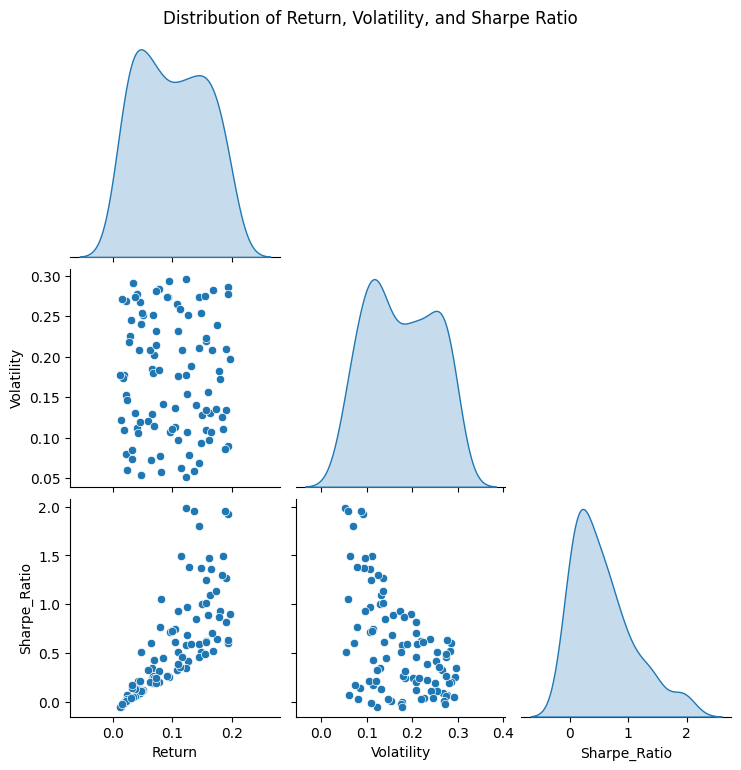

In [ ]:
# Pairplot to visualize the data distribution
#A pair plot helps visualize the relationships between returns, volatility, and Sharpe ratio
sns.pairplot(df, vars=["Return", "Volatility", "Sharpe_Ratio"], diag_kind='kde', corner=True)
plt.suptitle("Distribution of Return, Volatility, and Sharpe Ratio", y=1.02)
plt.show()


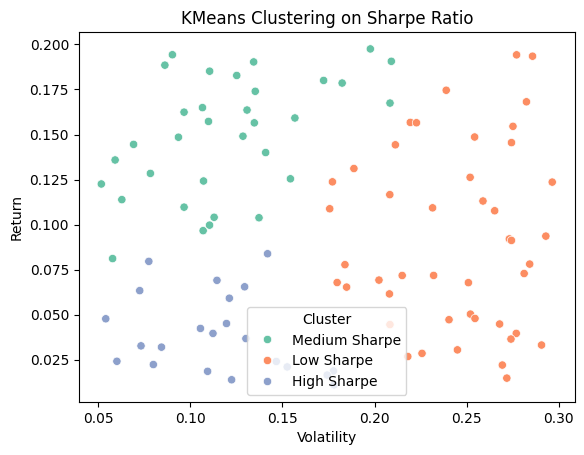

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Return', 'Volatility', 'Sharpe_Ratio']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Assign labels to clusters
df['KMeans_Label'] = df['KMeans_Cluster'].map({0: 'Low Sharpe', 1: 'Medium Sharpe', 2: 'High Sharpe'})

# Visualize the clusters
sns.scatterplot(data=df, x='Volatility', y='Return', hue='KMeans_Label', palette='Set2')
plt.title("KMeans Clustering on Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.legend(title="Cluster")
plt.show()


Understanding df.map

The map function in Pandas is used to substitute each value in a Series with another value, which can be derived from a function, a dictionary, or a Series. In essence, it's a way to transform values in a column based on a mapping you define.

How it's used in the code

In the code, df.map is used to assign labels ('Low Sharpe', 'Medium Sharpe', 'High Sharpe') to the KMeans cluster numbers (0, 1, 2).

df['KMeans_Label'] = df['KMeans_Cluster'].map({0: 'Low Sharpe', 1: 'Medium Sharpe', 2: 'High Sharpe'})

df['KMeans_Cluster']: This selects the column containing the cluster assignments (0, 1, or 2) generated by KMeans.
.map({0: 'Low Sharpe', 1: 'Medium Sharpe', 2: 'High Sharpe'}): This applies the mapping. The dictionary {0: 'Low Sharpe', 1: 'Medium Sharpe', 2: 'High Sharpe'} acts as a lookup table.
df['KMeans_Label'] = ...: The result of the mapping (the labels) is assigned to a new column called 'KMeans_Label'.
In simpler terms:

The map function looks at each value in the 'KMeans_Cluster' column.
If it finds a 0, it replaces it with 'Low Sharpe'.
If it finds a 1, it replaces it with 'Medium Sharpe'.
If it finds a 2, it replaces it with 'High Sharpe'.
Relating to Sharpe Ratio

The mapping is based on the interpretation of the clusters generated by KMeans:

Cluster 0: Represents stocks with generally lower Sharpe Ratios (low risk-adjusted returns).
Cluster 1: Represents stocks with medium Sharpe Ratios.
Cluster 2: Represents stocks with higher Sharpe Ratios (high risk-adjusted returns).
Therefore, by using df.map, you're essentially labeling each stock based on its assigned cluster and its implied Sharpe Ratio category (Low, Medium, High). This makes the clusters more interpretable and provides insights into the characteristics of each group of stocks.



StandardScaler normalizes the data for clustering.
KMeans identifies three clusters: low, medium, and high Sharpe ratios.
Scatterplots visualize the clusters based on returns and volatility.

In [ ]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Reverse scaling to original feature space
cluster_centers_original = scaler.inverse_transform(cluster_centers)

# Create a DataFrame for better visualization
cluster_features = pd.DataFrame(cluster_centers_original, columns=['Return', 'Volatility', 'Sharpe_Ratio'])
print(cluster_features)


     Return  Volatility  Sharpe_Ratio
0  0.092114    0.243379      0.302185
1  0.149113    0.119869      1.171522
2  0.039435    0.115366      0.203102


The cluster centers are in the scaled feature space, so we reverse the scaling to interpret them in terms of the original data.
This gives insights into the average Return, Volatility, and Sharpe Ratio for each cluster.


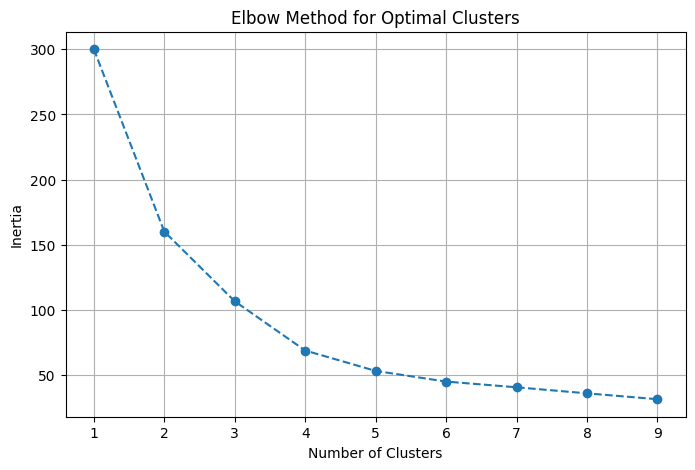

In [ ]:
#Elbow Method for Optimal Clusters
# Calculate inertia for different numbers of clusters
inertia = []
cluster_range = range(1, 10)  # Test for 1 to 9 clusters

for k in cluster_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(scaled_data)
    inertia.append(kmeans_test.inertia_)

# Plot the inertia
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


What is Inertia?

In the context of KMeans clustering, inertia is the sum of squared distances of samples to their closest cluster center. It's a measure of how spread out the data points are within their clusters. Lower inertia generally indicates tighter, more compact clusters, which is desirable.

Why Cluster Range is 1-9 (not 10)

In Python, the range(start, stop) function generates a sequence of numbers from start up to (but not including) stop. So, range(1, 10) creates a sequence from 1 to 9.

If you want to include 10 clusters in your analysis, you should use range(1, 11).


Step-by-step explanation:

Initialization:

inertia = []: An empty list is created to store the inertia values for different cluster numbers.
cluster_range = range(1, 10): This defines the range of cluster numbers to test (1 to 9 in this case).
Iteration:

for k in cluster_range:: The code iterates through each value of k (the number of clusters) in the cluster_range.
kmeans_test = KMeans(n_clusters=k, random_state=42): For each k, a KMeans model is initialized with that number of clusters and a random state for reproducibility.
kmeans_test.fit(scaled_data): The KMeans model is fitted to the scaled data (scaled_data).
inertia.append(kmeans_test.inertia_): The inertia value for the current model is calculated and added to the inertia list.
Plotting:

plt.figure(figsize=(8, 5)): A figure is created for the plot with a specified size.
plt.plot(cluster_range, inertia, marker='o', linestyle='--'): The inertia values are plotted against the corresponding cluster numbers, with markers and a line style for better visualization.
plt.title(...), plt.xlabel(...), plt.ylabel(...): Title and labels are added to the plot for clarity.
plt.xticks(cluster_range): X-axis ticks are set to correspond to the cluster numbers.
plt.grid(True): A grid is added to the plot for easier interpretation.
plt.show(): The plot is displayed.
Purpose:

This code implements the Elbow Method, a technique used to determine the optimal number of clusters for KMeans. By plotting inertia against the number of clusters, you look for the "elbow point" where the rate of decrease in inertia slows down significantly. This point often suggests a good balance between minimizing within-cluster variance and avoiding overfitting.

In this case, the elbow point appears to be at k = 3. This means that using 3 clusters provides a good balance between minimizing inertia (within-cluster variance) and avoiding overfitting (using too many clusters).

Reasoning
Before k = 3, the inertia decreases rapidly as you increase the number of clusters.

After k = 3, the inertia continues to decrease, but at a much slower rate. This indicates that adding more clusters beyond 3 provides diminishing returns in terms of reducing within-cluster variance.

Therefore, the optimal number of clusters according to the Elbow Method is 3.

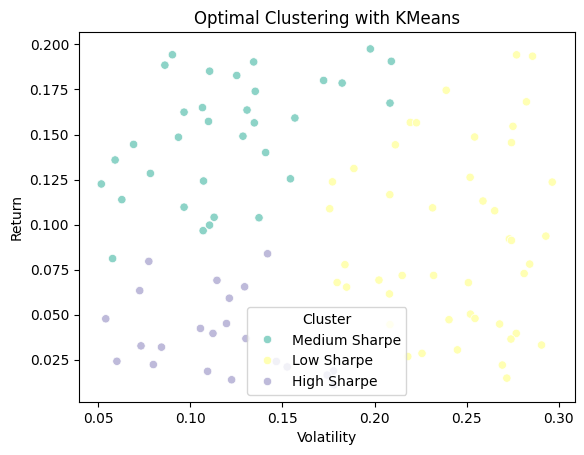

In [ ]:
# Refitting KMeans with optimal clusters (e.g., k=3)
optimal_kmeans = KMeans(n_clusters=3, random_state=42)
df['Optimal_Cluster'] = optimal_kmeans.fit_predict(scaled_data)

# Add cluster labels for interpretation
df['Optimal_Label'] = df['Optimal_Cluster'].map({0: 'Low Sharpe', 1: 'Medium Sharpe', 2: 'High Sharpe'})

# Visualize optimal clusters
sns.scatterplot(data=df, x='Volatility', y='Return', hue='Optimal_Label', palette='Set3')
plt.title("Optimal Clustering with KMeans")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.legend(title="Cluster")
plt.show()


After determining the optimal number of clusters, refit the KMeans model and analyze the resulting clusters.
The mapping of clusters can be adjusted based on the feature means (from the cluster_features DataFrame).

In [ ]:
# Analyze cluster features
print(cluster_features)


     Return  Volatility  Sharpe_Ratio
0  0.092114    0.243379      0.302185
1  0.149113    0.119869      1.171522
2  0.039435    0.115366      0.203102


The cluster features provide a summary of each group’s characteristics:
Average Return: Indicates the performance of the cluster.
Average Volatility: Measures the risk within the cluster.
Average Sharpe Ratio: Reflects the risk-adjusted return.

Hierarichal Clustering:
Understanding the process

fcluster's role: fcluster is used to form flat clusters from a hierarchical clustering represented by a linkage matrix. It doesn't directly provide cluster features.

Linkage matrix: The linkage matrix, obtained using scipy.cluster.hierarchy.linkage, encodes the hierarchical clustering structure.

Cluster assignments: fcluster assigns each data point to a cluster based on the linkage matrix and a specified criterion.

Calculating cluster features: To get the cluster features, we need to:

Group the data points by their assigned cluster labels.
Calculate the mean (or other desired statistics) of the features for each group.
Steps


import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster

# Assuming your data is in a DataFrame called 'df'
# and the features for clustering are in columns 'feature1', 'feature2', etc.

# 1. Perform hierarchical clustering and get the linkage matrix
linkage_matrix = linkage(df[['feature1', 'feature2']], method='ward')  # Replace with your desired method

# 2. Assign clusters using fcluster
df['cluster_labels'] = fcluster(linkage_matrix, t=3, criterion='maxclust')  # Adjust 't' and 'criterion' as needed

# 3. Calculate cluster features (e.g., mean)
cluster_features = df.groupby('cluster_labels')[['feature1', 'feature2']].mean()  # Replace with your feature columns

# Print the cluster features
print(cluster_features)

Explanation

linkage: Calculates the linkage matrix based on your specified features and linkage method (ward in this example).
fcluster: Assigns cluster labels to each data point in your DataFrame and stores them in a new column called cluster_labels.

groupby: Groups the data points based on their assigned cluster labels.

mean: Calculates the mean of the specified features (feature1, feature2) for each cluster group. This gives you the cluster features (centroids in this case).


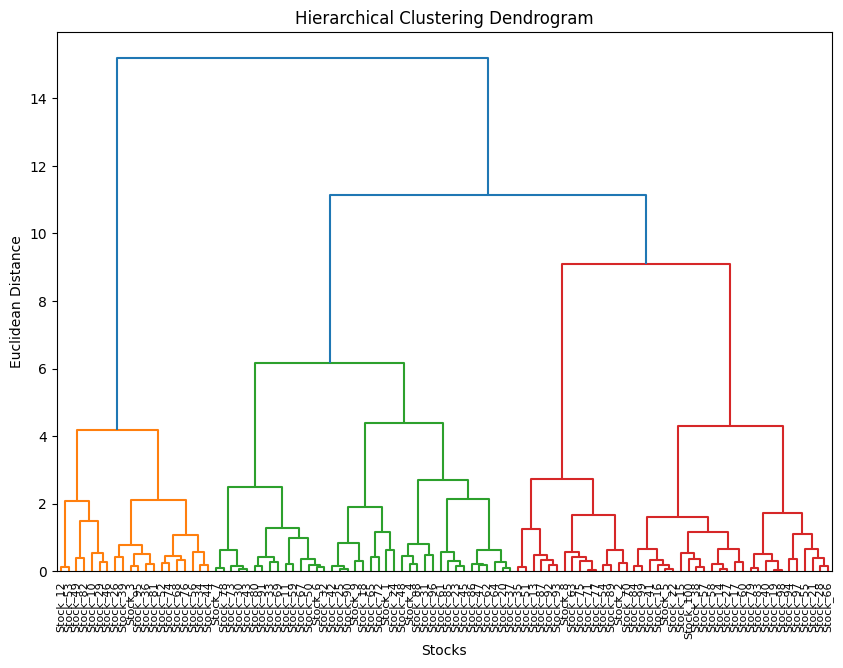

     Stock    Return  Volatility  Sharpe_Ratio   KMeans_Label  \
0  Stock_1  0.081163    0.057857      1.057129  Medium Sharpe   
1  Stock_2  0.190636    0.209103      0.816038  Medium Sharpe   
2  Stock_3  0.149079    0.128589      1.003809  Medium Sharpe   
3  Stock_4  0.123745    0.177143      0.585658     Low Sharpe   
4  Stock_5  0.039644    0.276892      0.070943     Low Sharpe   

  Hierarchical_Label  
0      Medium Sharpe  
1        High Sharpe  
2         Low Sharpe  
3      Medium Sharpe  
4        High Sharpe  


In [ ]:
# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df['Stock'].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Stocks")
plt.ylabel("Euclidean Distance")
plt.show()

# Assign clusters based on dendrogram
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Map labels to clusters
df['Hierarchical_Label'] = df['Hierarchical_Cluster'].map({1: 'Low Sharpe', 2: 'Medium Sharpe', 3: 'High Sharpe'})

# Compare results
print(df[['Stock', 'Return', 'Volatility', 'Sharpe_Ratio', 'KMeans_Label', 'Hierarchical_Label']].head())


Step-by-step explanation:

Perform hierarchical clustering:

linkage_matrix = linkage(scaled_data, method='ward'): This line calculates the linkage matrix, which is a fundamental data structure for hierarchical clustering. It uses the ward linkage method, which aims to minimize the variance within clusters.

Linkage Matrix

In hierarchical clustering, the linkage matrix is a data structure that stores information about how data points are merged into clusters during the clustering process. It's a key component in understanding the hierarchy of clusters formed.

Example

Let's say you have 5 data points (A, B, C, D, E). Here's a possible linkage matrix:


[[ 1.    2.    0.5   2.  ]
 [ 3.    4.    0.7   2.  ]
 [ 0.    5.    1.0   3.  ]
 [ 6.    7.    1.5   5.  ]]

Interpretation:

Row 1: Clusters 1 and 2 were merged first, with a distance of 0.5, forming a new cluster with 2 data points.
Row 2: Clusters 3 and 4 were merged next, with a distance of 0.7, forming a new cluster with 2 data points.
Row 3: Cluster 0 (likely representing the cluster formed in Row 1) was merged with Cluster 5 (formed in Row 2), with a distance of 1.0, creating a cluster with 3 data points.
Row 4: Clusters 6 and 7 (which could be the clusters from previous merges) were merged with a distance of 1.5, resulting in a final cluster with 5 data points.

Importance

The linkage matrix is essential for:

Building the dendrogram: The dendrogram is a visual representation of the clustering hierarchy. It's constructed based on the information in the linkage matrix.
Understanding cluster relationships: The linkage matrix shows the order and distances at which clusters are formed, revealing how data points are grouped.

Plot dendrogram:

dendrogram(linkage_matrix, ...): This function creates a dendrogram, a tree-like diagram that illustrates the arrangement of the clusters. It helps visualize how data points are merged step-by-step.
Assign clusters based on dendrogram:

df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust'): This line assigns cluster labels to data points based on the dendrogram. It cuts the dendrogram at a specific height (t=3) to form 3 clusters.
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

Purpose: This line assigns cluster labels to each stock in your DataFrame (df) based on the results of hierarchical clustering.

Components:

df['Hierarchical_Cluster']: This creates a new column in your DataFrame called 'Hierarchical_Cluster'. This column will store the cluster assignments for each stock.

fcluster(): This is a function from the scipy.cluster.hierarchy module. It's used to form flat clusters from a hierarchical clustering represented by a linkage matrix. In simpler terms, it takes the hierarchical clustering structure and divides it into a specified number of clusters.

linkage_matrix: This is the output from the linkage() function, which was used earlier in your code to perform the hierarchical clustering. It represents the relationships between the data points (stocks) in a hierarchical structure.

t=3: This argument specifies the desired number of clusters. In this case, you want to create 3 clusters, representing 'Low Sharpe', 'Medium Sharpe', and 'High Sharpe' stocks.

criterion='maxclust': This argument indicates the method used to determine the clusters. 'maxclust' means that the function will cut the dendrogram (a tree-like diagram representing the hierarchical clustering) in a way that results in the specified number of clusters (t=3 in this case).
fcluster Output:
The fcluster function, used to assign clusters based on the dendrogram, typically returns cluster labels starting from 1. In this case, it would assign labels 1, 2, and 3 to the three clusters.

In essence, this line of code takes the output of hierarchical clustering (linkage_matrix), divides it into 3 clusters (t=3) using the maxclust method, and assigns each stock to one of these clusters. The cluster assignments are then stored in the 'Hierarchical_Cluster' column of your DataFrame

Map labels to clusters:

df['Hierarchical_Label'] = df['Hierarchical_Cluster'].map({1: 'Low Sharpe', 2: 'Medium Sharpe', 3: 'High Sharpe'}): This line assigns more descriptive labels (e.g., 'Low Sharpe') to the clusters based on their characteristics.
Compare results:

print(df[...]): This line prints a portion of the DataFrame to compare the cluster assignments from KMeans and hierarchical clustering.
How Hierarchical Clustering Works

Hierarchical clustering is an iterative process that builds a hierarchy of clusters. There are two main types:

Agglomerative (bottom-up): Starts with each data point as its own cluster and iteratively merges the closest clusters until all points are in one cluster.
Divisive (top-down): Starts with all data points in one cluster and iteratively splits the cluster into smaller clusters until each point is in its own cluster.
The code uses the agglomerative approach with the ward linkage method. The dendrogram visualizes this process.


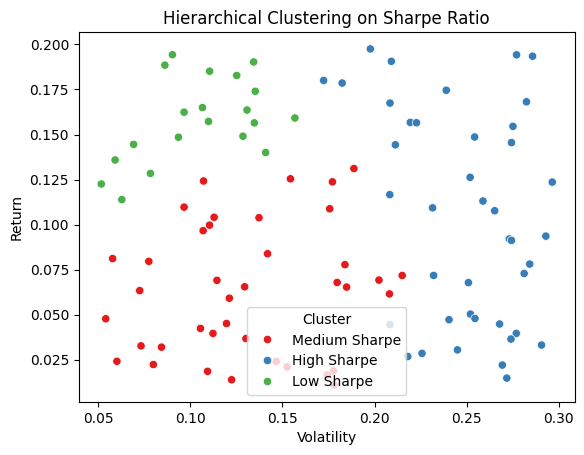

In [ ]:
# Visualize Hierarchical Clustering Results
sns.scatterplot(data=df, x='Volatility', y='Return', hue='Hierarchical_Label', palette='Set1')
plt.title("Hierarchical Clustering on Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.legend(title="Cluster")
plt.show()


Key Insights from Clustering:
Stocks are grouped based on Sharpe ratios into high, medium, and low categories.
Clustering allows for data-driven categorization of stocks based on risk-adjusted returns.
By comparing KMeans and hierarchical clustering, you can validate consistency in cluster assignments.
This approach can help portfolio managers or investors identify stocks with desirable risk-return profiles efficiently.